In [ ]:
wb_command -metric-resample /Users/adebimpe/Documents/aslprep_paper/scripts/pncdata/cbfmean/lh.surf.gii  /Users/adebimpe/Documents/xcpEngine/thirdparty/standard_mesh_atlases/resample_fsaverage/fsaverage5_std_sphere.lh.10k_fsavg_lh.surf.gii  \
/Users/adebimpe/Documents/xcpEngine/thirdparty/standard_mesh_atlases/resample_fsaverage/fs_LR-deformed_to-fsaverage.lh.sphere.32k_fs_LR.surf.gii \ 
ADAP_BARY_AREA metricout32k.surf.gii  -area-metrics /Users/adebimpe/Documents/xcpEngine/thirdparty/standard_mesh_atlases/resample_fsaverage/fsaverage5.lh.midthickness_va_avg.10k_fsavg_lh.shape.gii  \
/Users/adebimpe/Documents/xcpEngine/thirdparty/standard_mesh_atlases/resample_fsaverage/fs_LR.lh.midthickness_va_avg.32k_fs_LR.shape.gii 

In [14]:
import nibabel as nb 
import numpy as np 
petL ='scripts/PET/PET_CMRGlu.lh.HCP_32k.func.gii'
petR ='scripts/PET/PET_CMRGlu.rh.HCP_32k.func.gii'
cbfL ='scripts/pncdata/cbfmean/metricout32kL.func.gii'
cbfR ='scripts/pncdata/cbfmean/metricout32kR.func.gii'

In [15]:
atlasL ='scripts/PET/Q1-Q6_RelatedParcellation210.L.CorticalAreas_dil_Colors.32k_fs_LR.label.gii'
atlasR ='scripts/PET/Q1-Q6_RelatedParcellation210.R.CorticalAreas_dil_Colors.32k_fs_LR.label.gii'

In [37]:
def extractroi(atlasL,giftiL):
    atlasL = nb.load(atlasL).agg_data()
    #atlasR = nb.load(atlasR).agg_data()
    
    #giftiR = nb.load(giftiR).agg_data()
    giftiL = nb.load(giftiL).agg_data()
    #giftiR = stats.zscore(giftiR)
    #giftiL = stats.zscore(giftiL)
    
    datay =[]
    
    for i in np.unique(atlasL):
        if i !=0:
            datay.append(np.mean(giftiL[atlasL==i]))
    

    
    return np.array(datay)


In [38]:
petdata  = extractroi(atlasL=atlasL,giftiL=petL)
cbfdata = extractroi(atlasL=atlasL,giftiL=cbfL)
np.corrcoef(petdata,cbfdata)

array([[1.        , 0.09428987],
       [0.09428987, 1.        ]])

In [39]:
datax ='scripts/pncdata/cbfmean/cbffile_mean.nii.gz'
atlas = '/Users/adebimpe/Documents/xcp_abcd/xcp_abcd/data/niftiatlas/glasser360/glasser360MNI.nii.gz'
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas,smoothing_fwhm=None,standardize=False)
time_series = masker.fit_transform(datax)


In [36]:
min(cbfdata)

31.191895

In [59]:
def extractroi(atlasL,atlasR,giftiL,giftiR):
    atlasL = nb.load(atlasL).agg_data()
    atlasR = nb.load(atlasR).agg_data()
    
    giftiR = nb.load(giftiR).agg_data()
    giftiL = nb.load(giftiL).agg_data()
    #giftiR = giftiR
    #giftiL = gif
    
    datay =[]
    
    for i in np.unique(atlasL):
        if i !=0:
            datay.append(np.mean(giftiL[atlasL==i]))
    
    for i in np.unique(atlasR):
        if i !=0:
            datay.append(np.mean(giftiR[atlasR==i]))
            
    
    return np.array(datay), np.append(giftiL,giftiR)
    


In [60]:
petdata  = extractroi(atlasL=atlasL,atlasR=atlasR,giftiL=petL,giftiR=petR)[0]
cbfdata = extractroi(atlasL=atlasL,atlasR=atlasR,giftiL=cbfL,giftiR=cbfR)[0]
np.corrcoef(petdata,cbfdata)[0]

array([1.        , 0.12395843])

In [49]:
np.corrcoef(cbfdata,time_series)

array([[1.        , 0.78169361],
       [0.78169361, 1.        ]])

In [65]:
yy= (petdata -np.mean(petdata))/np.std(petdata)

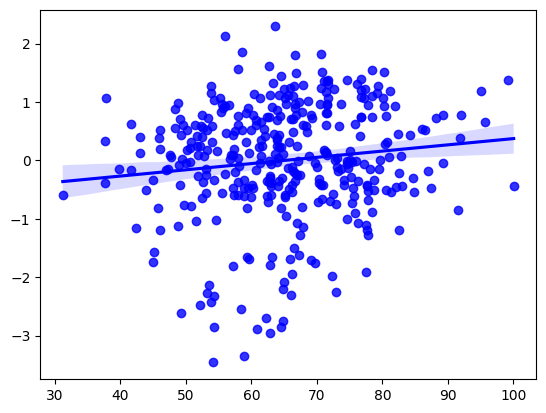

In [67]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.regplot(x=cbfdata, y=yy, color="b")
plt.show()

In [68]:
petdata

array([7053.7773, 6402.7827, 6751.486 , 6899.6357, 6750.577 , 6561.3203,
       6572.9893, 6694.888 , 6843.343 , 7012.475 , 7136.9414, 6928.4517,
       6559.5225, 6800.429 , 7831.607 , 6954.0967, 7115.823 , 6214.9253,
       6797.7896, 6395.9023, 6119.355 , 6206.233 , 6399.151 , 7194.854 ,
       6270.8984, 6814.32  , 6915.0386, 6125.344 , 7257.9014, 7645.779 ,
       6914.0176, 6982.767 , 7289.619 , 7616.259 , 7046.946 , 6635.968 ,
       6020.7744, 6246.775 , 6155.242 , 6310.194 , 5899.7017, 6125.1626,
       6991.0947, 6693.2905, 6525.9355, 6783.986 , 6427.747 , 7033.6978,
       6472.2456, 7121.5986, 6232.523 , 6354.786 , 6808.374 , 6617.275 ,
       6489.384 , 6313.817 , 5996.9204, 5636.304 , 5920.8413, 6315.8457,
       6120.938 , 6526.126 , 7068.2256, 6412.464 , 6691.1704, 6925.958 ,
       6961.7197, 7054.326 , 6473.986 , 6430.5015, 6434.535 , 6572.917 ,
       7407.5376, 7035.6343, 6950.053 , 6705.683 , 6625.0615, 6918.6484,
       7322.4766, 7204.958 , 7308.758 , 7225.0864, 